Importaciones

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

Cargar datos de accidentalidad

In [4]:
# Cargar datos de festividades
datosFestividades = pd.read_csv("https://raw.githubusercontent.com/Dltr17/AccidentalidadVial2017-2021/main/datos/dataFestividades.csv")

# Cargar datos de accidentes
datosAccidentes = pd.read_csv("https://raw.githubusercontent.com/Dltr17/AccidentalidadVial2017-2021/main/datos/dataAccidentalidad2017-2021(Transformada).csv")


NameError: name 'pd' is not defined

Exploracion de datos

In [12]:
print("Exloracion datos accidentes")
print(datosAccidentes.head())
print(datosAccidentes.info())


Exloracion datos accidentes
   Índice NomDepartamento   Año  Día  NumMes
0       1          Boyacá  2017   10      12
1       2       Antioquia  2017   25      12
2       3          Boyacá  2018   19       4
3       4       Antioquia  2017   26       9
4       5       Antioquia  2017   10       2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18553 entries, 0 to 18552
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Índice           18553 non-null  int64 
 1   NomDepartamento  18553 non-null  object
 2   Año              18553 non-null  int64 
 3   Día              18553 non-null  int64 
 4   NumMes           18553 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 724.9+ KB
None


In [10]:
print("Exloracion datos Festividades")
print(datosFestividades.head())
print(datosFestividades.info())

Exloracion datos Festividades
   Índice  mes  DiaInicio  DiaFin  año NomDepartamento     Municipio  \
0       1    4         26      30  NaN           Cesar    Valledupar   
1       2    4         27      29  NaN         Córdoba  planeta rica   
2       3    8         14       5  NaN       Antioquia      Medellin   
3       4    8         17      20  NaN         Bolívar   San Jacinto   
4       5    8         18      30  NaN           Chocó         Nuqui   

      Orden                                       Nombre  
0  Nacional             Festival de la leyenda vallenata  
1  Nacional      Concurso nacional de bandas folcloricas  
2  Nacional                          Feria de las Flores  
3  Nacional  Festival Autoctono de gaitas de san jacinto  
4  Nacional             Festival de la Miracion Pacifico  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           -----------

Crear una columna nueva en los datos de accidentes para indicar si hay festividad y el ID de la festividad


In [15]:
datosAccidentes['Festividad'] = 0
datosAccidentes['ID_Festividad'] = 0

Iterar sobre cada fila de los datos de accidentes y generar el nuevo archivo de datos

In [18]:
# Iterar sobre cada fila de los datos de accidentes
for indice, fila in datosAccidentes.iterrows():
    departamento = fila['NomDepartamento']
    mes = fila['NumMes']
    dia = fila['Día']

    # Buscar en los datos de festividades si hay una festividad correspondiente
    festividad = datosFestividades[(datosFestividades['NomDepartamento'] == departamento) &
                                    (datosFestividades['mes'] == mes) &
                                    (datosFestividades['DiaInicio'] <= dia) &
                                    (datosFestividades['DiaFin'] >= dia)]

    # Si se encuentra una festividad, actualizar las columnas correspondientes en los datos de accidentes
    if not festividad.empty:
        datosAccidentes.at[indice, 'Festividad'] = 1
        datosAccidentes.at[indice, 'ID_Festividad'] = festividad['Índice'].iloc[0]

# Guardar los datos de accidentes con las nuevas columnas en un nuevo archivo
datosAccidentes.to_csv("datosAccidentes_con_festividades.csv", index=False)

# Descargar el archivo
from google.colab import files
files.download("datosAccidentes_con_festividades.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
datosAccidentes

,Índice,NomDepartamento,Año,Día,NumMes,Festividad,ID_Festividad
0,1,Boyacá,2017,10,12,0,0
1,2,Antioquia,2017,25,12,0,0
2,3,Boyacá,2018,19,4,0,0
3,4,Antioquia,2017,26,9,0,0
4,5,Antioquia,2017,10,2,0,0
...,...,...,...,...,...,...,...
18548,18549,Putumayo,2019,20,5,0,0
18549,18550,Córdoba,2021,19,5,0,0
18550,18551,Tolima,2018,19,3,1,95
18551,18552,Antioquia,2019,25,3,0,0


from matplotlib import pyplot as plt
datosAccidentes['Índice'].plot(kind='hist', bins=20, title='Índice')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
datosAccidentes['Año'].plot(kind='hist', bins=20, title='Año')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
datosAccidentes['Día'].plot(kind='hist', bins=20, title='Día')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
datosAccidentes['NumMes'].plot(kind='hist', bins=20, title='NumMes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
datosAccidentes.plot(kind='scatter', x='Índice', y='Año', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
datosAccidentes.plot(kind='scatter', x='Año', y='Día', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
datosAccidentes.plot(kind='scatter', x='Día', y='NumMes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
datosAccidentes.plot(kind='scatter', x='NumMes', y='Festividad', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Índice']
  ys = series['Año']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = datosAccidentes.sort_values('Índice', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Índice')
_ = plt.ylabel('Año')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Índice']
  ys = series['Día']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = datosAccidentes.sort_values('Índice', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Índice')
_ = plt.ylabel('Día')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Índice']
  ys = series['NumMes']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = datosAccidentes.sort_values('Índice', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Índice')
_ = plt.ylabel('NumMes')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Índice']
  ys = series['Festividad']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = datosAccidentes.sort_values('Índice', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Índice')
_ = plt.ylabel('Festividad')

from matplotlib import pyplot as plt
datosAccidentes['Índice'].plot(kind='line', figsize=(8, 4), title='Índice')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
datosAccidentes['Año'].plot(kind='line', figsize=(8, 4), title='Año')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
datosAccidentes['Día'].plot(kind='line', figsize=(8, 4), title='Día')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
datosAccidentes['NumMes'].plot(kind='line', figsize=(8, 4), title='NumMes')
plt.gca().spines[['top', 'right']].set_visible(False)

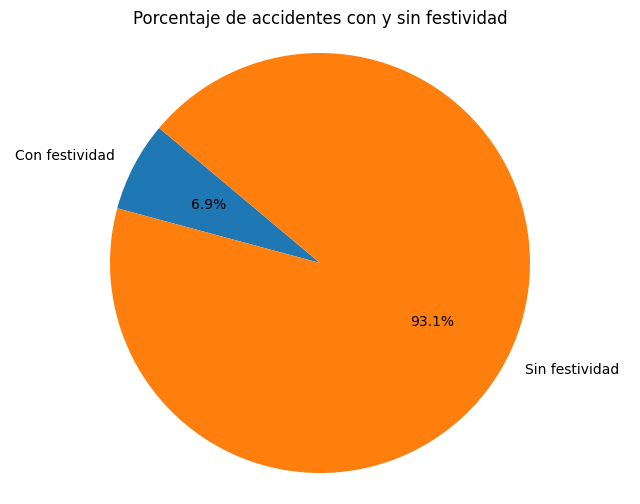

In [19]:
# Calcular el número de accidentes asociados con una festividad y los que no
accidentes_con_festividad = datosAccidentes['Festividad'].sum()
accidentes_sin_festividad = len(datosAccidentes) - accidentes_con_festividad

# Calcular los porcentajes
porcentaje_con_festividad = accidentes_con_festividad / len(datosAccidentes) * 100
porcentaje_sin_festividad = accidentes_sin_festividad / len(datosAccidentes) * 100

# Crear una lista con los porcentajes y los nombres de las categorías
porcentajes = [porcentaje_con_festividad, porcentaje_sin_festividad]
categorias = ['Con festividad', 'Sin festividad']

# Crear el gráfico circular
plt.figure(figsize=(8, 6))
plt.pie(porcentajes, labels=categorias, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de accidentes con y sin festividad')
plt.axis('equal')
plt.show()

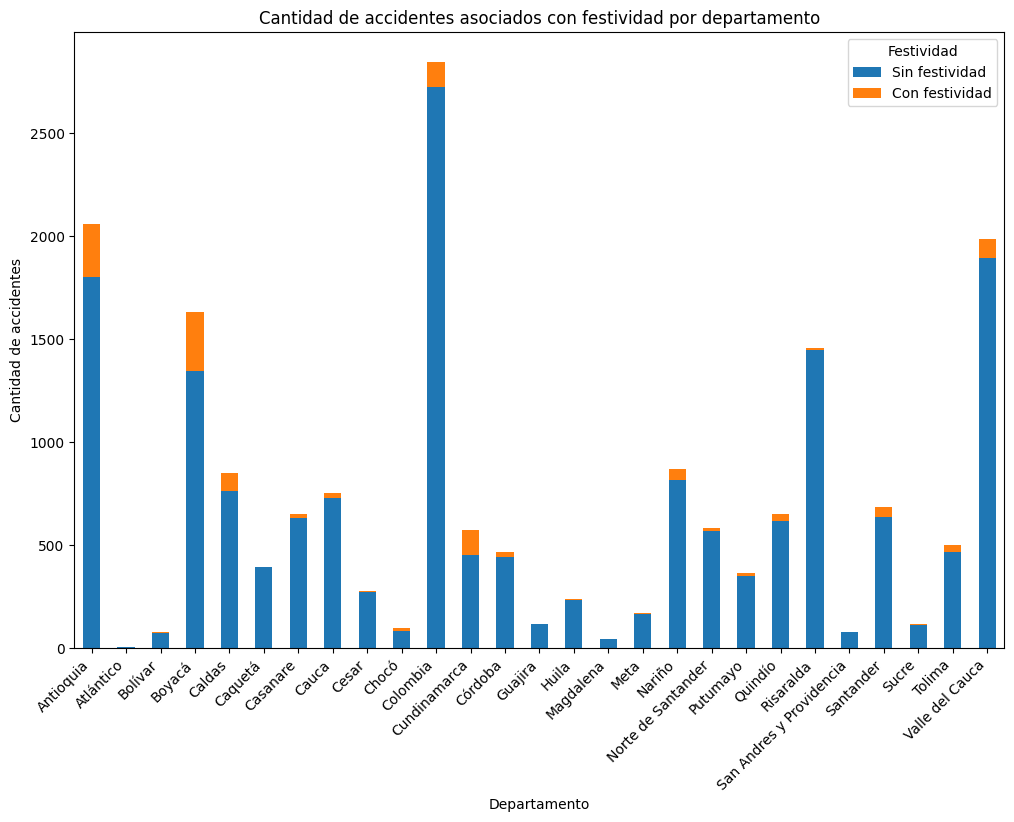

In [21]:
# Calcular la cantidad de accidentes asociados con una festividad y los que no por departamento
accidentes_por_departamento = datosAccidentes.groupby(['NomDepartamento', 'Festividad']).size().unstack(fill_value=0)

# Crear el gráfico de barras
accidentes_por_departamento.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Cantidad de accidentes asociados con festividad por departamento')
plt.xlabel('Departamento')
plt.ylabel('Cantidad de accidentes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Festividad', labels=['Sin festividad', 'Con festividad'])
plt.show()

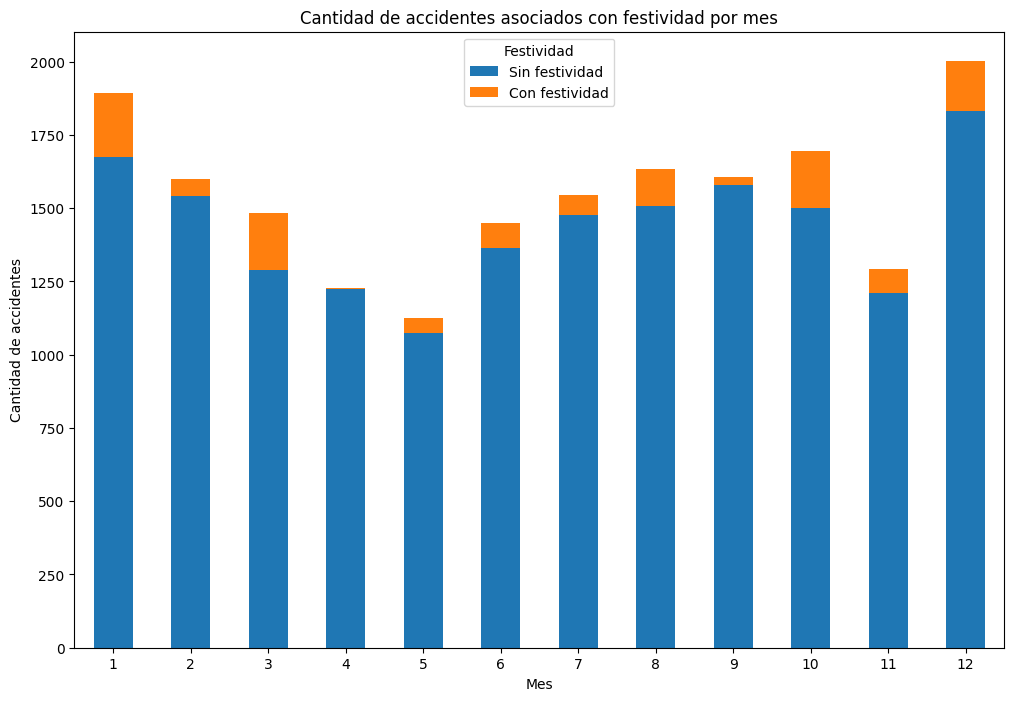

In [22]:
# Calcular la cantidad de accidentes asociados con una festividad y los que no por mes
accidentes_por_mes = datosAccidentes.groupby(['NumMes', 'Festividad']).size().unstack(fill_value=0)

# Crear el gráfico de barras
accidentes_por_mes.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Cantidad de accidentes asociados con festividad por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de accidentes')
plt.xticks(rotation=0)
plt.legend(title='Festividad', labels=['Sin festividad', 'Con festividad'])
plt.show()